In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
df= sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [38]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

<Axes: >

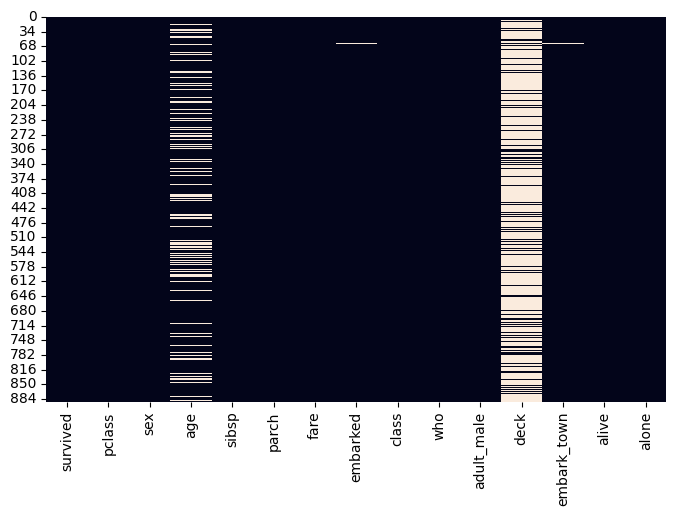

In [39]:
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull(), cbar=False)

In [40]:
df.isnull().sum().sort_values(ascending=False) 

deck           688
age            177
embarked         2
embark_town      2
sex              0
pclass           0
survived         0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

In [41]:
len(df)

891

In [42]:
round(df.isnull().sum()/ len(df)*100,3).sort_values(ascending=False)

deck           77.217
age            19.865
embarked        0.224
embark_town     0.224
sex             0.000
pclass          0.000
survived        0.000
fare            0.000
parch           0.000
sibsp           0.000
class           0.000
adult_male      0.000
who             0.000
alive           0.000
alone           0.000
dtype: float64

In [43]:
df.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
sex              0
pclass           0
survived         0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

In [44]:
df['age']= df['age'].fillna(df['age'].mean())

In [45]:
df['embark_town']= df['embark_town'].fillna(df['embark_town'].mode()[0])

In [ ]:
df.drop('deck', inplace=True, axis=1)

In [47]:
df['embarked'].mode()[0]

'S'

In [48]:
df['embarked'].value_counts()

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [50]:
df['embarked']= df['embarked'].fillna(df['embarked'].mode()[0])

In [51]:
df.isnull().sum().sort_values(ascending=False)

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

# We can also use `sklearn` handle the missing values:

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer

In [80]:
data= sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Univariate

In [69]:
# impute age column using simpleimputer from sklearn
imputer= SimpleImputer(strategy='mean')
data['age']= imputer.fit_transform(data[['age']])

In [70]:
data.isnull().sum().sort_values(ascending=False)

deck           688
embarked         2
embark_town      2
age              0
survived         0
pclass           0
sex              0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

# Multivariate

In [71]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [95]:
data=sns.load_dataset('titanic')

In [92]:
# drop rows having missing values
data.dropna(inplace=True)

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 1 to 889
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     182 non-null    int64   
 1   pclass       182 non-null    int64   
 2   sex          182 non-null    object  
 3   age          182 non-null    float64 
 4   sibsp        182 non-null    int64   
 5   parch        182 non-null    int64   
 6   fare         182 non-null    float64 
 7   embarked     182 non-null    object  
 8   class        182 non-null    category
 9   who          182 non-null    object  
 10  adult_male   182 non-null    bool    
 11  deck         182 non-null    category
 12  embark_town  182 non-null    object  
 13  alive        182 non-null    object  
 14  alone        182 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 18.2+ KB


In [73]:
imputer= IterativeImputer()
data['age']= imputer.fit_transform(data[['age']])

# Forward fill (ffill) and backward fill (bfill):

In [84]:
data['age']= data['age'].ffill()

In [77]:
data.isnull().sum().sort_values(ascending=False)

deck           688
embarked         2
embark_town      2
age              0
survived         0
pclass           0
sex              0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

In [82]:
data.drop('deck', axis= 1, inplace=True)

In [86]:
data.isnull().sum().sort_values(ascending=False)

embark_town    2
embarked       2
sex            0
age            0
survived       0
pclass         0
parch          0
sibsp          0
class          0
fare           0
who            0
adult_male     0
alive          0
alone          0
dtype: int64

In [85]:
data['age']= data['age'].bfill()

In [88]:
data.isnull().sum().sort_values(ascending=False)

embark_town    2
embarked       2
sex            0
age            0
survived       0
pclass         0
parch          0
sibsp          0
class          0
fare           0
who            0
adult_male     0
alive          0
alone          0
dtype: int64

# Using KNN imputer:

In [96]:
from sklearn.impute import KNNImputer
 
# impute age column using KNNImputer from sklearn
imputer= KNNImputer(n_neighbors=5)
data['age']= imputer.fit_transform(data[['age']])

In [99]:
data['embark_town']= data['embark_town'].fillna(data['embark_town'].mode()[0])

# Data Inconsistency:

In [1]:
import pandas as pd
import numpy as np


In [7]:
df= {'Date':['2024-12-01', '01-12-2025', '2024/12/01', '12-01-2024'],
     'Country_Name': ['USA', 'United State Of America', 'U.S.A', 'usa'],
     'Name':['John', 'Jhon', 'Joon', 'jonh'],
    'Sale_2024': [100, 200, None, 200], 
    'Sale_2025': [None, 150, 300, 150]}

In [3]:
data=pd.DataFrame(df)
data

,Date,Country_Name,Name,Sale_2024,Sale_2025
0,2024-12-01,USA,John,100.0,NaN
1,01-12-2025,United State Of America,Jhon,200.0,150.0
2,2024/12/01,U.S.A,Joon,NaN,300.0
3,12-01-2024,usa,jonh,200.0,150.0


In [4]:
# Standardize the format:
data['Date']=pd.to_datetime(df['Date'], errors= 'coerce')
data.head()

,Date,Country_Name,Name,Sale_2024,Sale_2025
0,2024-12-01,USA,John,100.0,NaN
1,NaT,United State Of America,Jhon,200.0,150.0
2,NaT,U.S.A,Joon,NaN,300.0
3,NaT,usa,jonh,200.0,150.0


In [5]:
data['Date']= pd.to_datetime(data['Date'], errors='coerce')
data['Date']= data['Date'].dt.strftime('%Y-%m-%d')
data.head()

,Date,Country_Name,Name,Sale_2024,Sale_2025
0,2024-12-01,USA,John,100.0,NaN
1,NaN,United State Of America,Jhon,200.0,150.0
2,NaN,U.S.A,Joon,NaN,300.0
3,NaN,usa,jonh,200.0,150.0


In [196]:
# Harmonize the name of the country
country_mapping= {'USA': 'United State','United State Of America':'United State', 'U.S.A':'United State','usa':'United State'}
data['Country_Name']= data['Country_Name'].replace(country_mapping)

In [183]:
data.head()

,Date,Country_Name,Name,Sale_2024,Sale_2025
0,2024-12-01,United State,John,100.0,NaN
1,NaN,United State,Jhon,200.0,150.0
2,NaN,United State,Joon,NaN,300.0
3,NaN,United State,jonh,200.0,150.0


In [197]:
# Correct the typographical mistakes in name:
# Let's assume we want to correct 'jonh' to 'john
data['Name']= data['Name'].replace({'John' : 'john','Jhon':'john', 'Joon':'john', 'jonh': 'john'})
data.head()

,Date,Country_Name,Name,Sale_2024,Sale_2025
0,2024-12-01,United State,john,100.0,NaN
1,NaN,United State,john,200.0,150.0
2,NaN,United State,john,NaN,300.0
3,NaN,United State,john,200.0,150.0


In [191]:
# Remove the duplicates
data= data.drop_duplicates(subset='Name')
data.head()

,Date,Country_Name,Name,Sale_2024,Sale_2025
0,2024-12-01,United State,john,100.0,NaN


In [204]:
# Resolve the contradictory data
# for demonstrate, let's assume sale_2024 should always be heigher than sale_2025
# we well remove rows where this condition is not met
data= data.drop(data[data['Sale_2025'] <= data['Sale_2024']].index)
data.head()

,Date,Country_Name,Name,Sale_2024,Sale_2025
0,2024-12-01,United State,john,100.0,NaN
2,NaN,United State,john,NaN,300.0


# Outliers using z-scores:

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
data= pd.DataFrame({'Age': [20,21,22,23,24,25,26,55]})

In [19]:
# Calculate the mean and standard deviation
mean= np.mean(data['Age'])
standard_deviation= np.std(data['Age'])

# Calculate the z-score
data['z_score']=(data['Age']-mean) / standard_deviation 

data




,Age,z_score
0,20,-0.651339
1,21,-0.558291
2,22,-0.465242
3,23,-0.372194
4,24,-0.279145
5,25,-0.186097
6,26,-0.093048
7,55,2.605356


In [ ]:
# print outliers
print(f' Outliers based on the threshold, 1:\n {data[data['z_score'] > 2]}')

,Age,z_score
7,55,2.605356


In [41]:
# remove the outliers
data= data[data['z_score'] <= 2]
data

,Age,z_score
0,20,-0.651339
1,21,-0.558291
2,22,-0.465242
3,23,-0.372194
4,24,-0.279145
5,25,-0.186097
6,26,-0.093048


In [43]:
# data without outliers
data

,Age,z_score
0,20,-0.651339
1,21,-0.558291
2,22,-0.465242
3,23,-0.372194
4,24,-0.279145
5,25,-0.186097
6,26,-0.093048


In [63]:
# handles the outliers using scipy or stats:
import pandas as pd
import numpy as np
from scipy import stats 

data= [2.2, 2.4, 2.6, 2.8, 3.0, 3.2, 3.4, 3.6, 110.2]

In [64]:
# calculate the z_scores for each data points
z_scores= np.abs(stats.zscore(data))
z_scores

array([0.37428116, 0.36835065, 0.36242014, 0.35648963, 0.35055912,
       0.34462861, 0.3386981 , 0.33276758, 2.828195  ])

In [ ]:
# set the threshold for identifying outliers 
threshold= 2.2
outliers= np.where(z_scores > threshold)[0] # show the index number
outliers


array([8])

In [66]:
data

[2.2, 2.4, 2.6, 2.8, 3.0, 3.2, 3.4, 3.6, 110.2]

In [68]:
print('outliers:', [data[i] for i in outliers]) #check outliers


outliers: [110.2]


In [72]:
# remove the outliers
data= [data[i] for i in range(len(data)) if i not in outliers]
data

[2.2, 2.4, 2.6, 2.8, 3.0, 3.2, 3.4, 3.6]

# IQR method:

In [ ]:
import pandas as pd
import numpy as np

data= pd.DataFrame({'age': [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 50]})
data

,age
0,20
1,21
2,22
3,23
4,24
5,25
6,26
7,27
8,28
9,29


In [11]:
# Calculate the first and third qurtile
Q1= np.percentile(data['age'], 25, interpolation= 'midpoint')
Q3= np.percentile(data['age'], 75, interpolation= 'midpoint')

In [12]:
# Calculate the IQR
IQR= Q3 - Q1
IQR

np.float64(6.0)

In [13]:
# Calculate the lower and upper bound
lower_bound= Q1 - (1.5 * IQR)
upper_bound= Q1 + (1.5 * IQR)

In [14]:
# Print the outliers
data[(data['age'] < lower_bound) | (data['age'] > upper_bound)]

,age
11,50


In [16]:
# remove the outliers
data= data[(data['age'] >= lower_bound) & (data['age'] <= upper_bound)]
data

,age
0,20
1,21
2,22
3,23
4,24
5,25
6,26
7,27
8,28
9,29


# outlier using the clustering:

In [17]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# Sample data
data= [[2,2], [3,3], [4,4], [5,5], [6,6], [30, 30],[32, 32]]

In [18]:
# Create a K-Means model with two clusters (normal and outliers)
kmeans= KMeans(n_clusters=2, n_init=10)
kmeans.fit(data)

,n_clusters,2
,init,'k-means++'
,n_init,10
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [ ]:
labels= kmeans.predict(data)  # predict cluster labels
labels

array([0, 0, 0, 0, 0, 1, 1], dtype=int32)

In [23]:
# identify outliers based on cluster labels
outliers= [data[i] for i, label in enumerate(labels) if label == 1]
outliers

[[30, 30], [32, 32]]

In [24]:
data

[[2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [30, 30], [32, 32]]

In [25]:
outliers

[[30, 30], [32, 32]]

In [27]:
data= [data[i] for i, label in enumerate(labels) if label == 0] 
data

[[2, 2], [3, 3], [4, 4], [5, 5], [6, 6]]

In [29]:
age= 18
if age >=18:
    print('you are adult')
elif age > 13:
    print('you are a teenager')
else:
    print('you are a child')

you are adult


In [30]:
fruits= ['apple', 'banana', 'grapes', 'cherry']
for fruit in fruits:
    print(fruit)

apple
banana
grapes
cherry


In [31]:
count= 0
while count < 5:
    print(count)
    count+=1

0
1
2
3
4


In [32]:
for i in range(5):
    if i==3:
        break
    print(i)

0
1
2
